# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     765.9
Date:                Sat, 25 Jan 2025   Prob (F-statistic):           2.97e-39
Time:                        16:03:34   Log-Likelihood:                -4.3966
No. Observations:                  50   AIC:                             16.79
Df Residuals:                      46   BIC:                             24.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9032      0.094     52.224      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.34119509  4.86133569  5.33815526  5.74171014  6.05286318  6.26642792
  6.39202072  6.45248078  6.4801178   6.5114035   6.58097949  6.71596571
  6.93150471  7.22827379  7.5923737   7.99761224  8.40980761  8.79240433
  9.11247922  9.34615061  9.48250199  9.52537559  9.49274111  9.41374333
  9.32391373  9.25933275  9.25070188  9.31829951  9.46864922  9.69344799
  9.97093035 10.26944441 10.55265215 10.78549968 10.93997646 10.99971738
 10.96269149 10.8415357  10.66147852 10.45619516 10.26227471 10.11320874
 10.03388864 10.03651612 10.11859842 10.26335796 10.44248876 10.62080707
 10.76203198 10.83474622]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.8002046  10.62032842 10.31666438  9.93831475  9.54991534  9.21581047
  8.98429919  8.87581002  8.87789931  8.9482979 ]


## Plot comparison

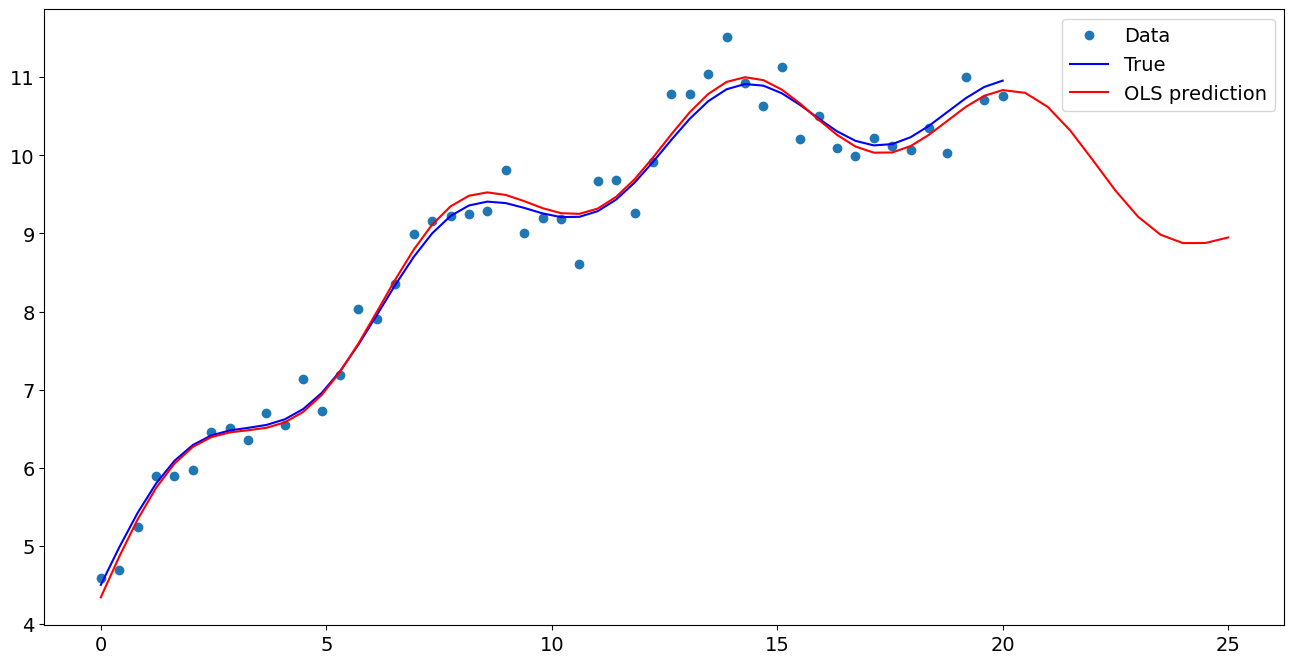

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.903218
x1                  0.524407
np.sin(x1)          0.549434
I((x1 - 5) ** 2)   -0.022481
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.800205
1    10.620328
2    10.316664
3     9.938315
4     9.549915
5     9.215810
6     8.984299
7     8.875810
8     8.877899
9     8.948298
dtype: float64